# Part 2: Stochastic Gradient Descent, Momentum, and Adam

### For this part of the lab, using the same data and setup as in Part 1, compare how stochastic gradient descent (SGD), SGD with momentum, and adam will perform over iterations. You are free to write all of the code on your own, or if you prefer, you can fill in the missing sections in the code below.

### Start by reusing some of the functions you have coded for Part 1.

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

## generate M data points roughly forming a line (noise added)
M = 50
theta_true = torch.Tensor([[0.5], [2]])

X = 10 * torch.rand(M, 2) - 5
X[:, 1] = 1.0

y = torch.mm(X, theta_true) + 0.3 * torch.randn(M, 1)

## hypothesis computes $h_theta$
def hypothesis(theta, X):
    ## YOUR CODE HERE
    y = torch.matmul(X,theta)
    return y
  
## grad_cost_func computes the gradient of J for linear regression given J is the MSE 
def grad_cost_func(theta, X, y): 
    ## YOUR CODE HERE
    dJ = (1/M) *( X.t() @ (hypothesis(theta, X) - y))
    return dJ
  
## cost_func computes
def cost_func(theta, X, y):
    ## YOUR CODE HERE
    J = (1/(2 * M)) * (np.power(hypothesis(theta, X) - y, 2))
    Js = torch.sum(J,0)
    return Js

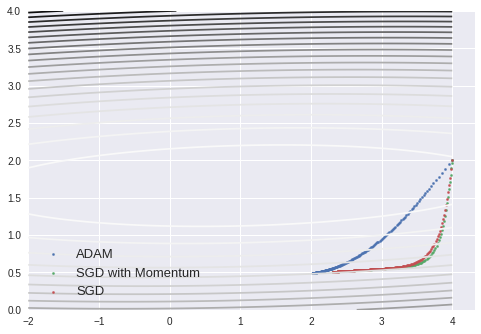

In [0]:
## THIS CODE IS ADAM
import math
def weightupdate_adam(iteration,X,y):
    ## YOUR CODE HERE
    gr = grad_cost_func(theta_adam_0, X, y)
    mtt = beta_1 * mt + (1 - beta_1) * gr
    vtt = beta_2 * vt + (1 - beta_2) * (gr**2)
    mttt = mtt / (1 - (beta_1**(iteration + 1)))
    vttt = vtt / (1 - (beta_2**(iteration + 1)))
   # vttt_sqrt = np.array([math.sqrt(vtt[0]),math.sqrt(vtt[1])]) 
    vttt_sqrt = torch.sqrt(torch.Tensor(vttt))
    theta = theta_adam_0 - alpha * mttt / (vttt_sqrt)
    return mtt, vtt,theta

    

def weightupdate_sgd_momentum(X,y):
    ## YOUR CODE HERE
    grad = grad_cost_func(theta_sgdm_0, X, y)
    gr = beta_1 * vect + (1 - beta_1) * grad
    theta = theta_sgdm_0 - alpha * gr
    return gr, theta

def weigthupdate_sgd(X,y):
    ## YOUR CODE HERE
    gr = grad_cost_func(theta_sgd_0, X, y)
    theta = theta_sgd_0 - alpha * gr
    return theta


N = 200
beta_1 = 0.9
beta_2 = 0.999
alpha = 0.01

theta_0 = torch.Tensor([[2],[4]]) #initialise

# initialise necessary parameters used in the def functions above
gr = 0
mt = 0
vt = 0
vect = 0
theta_sgd, theta_sgdm,theta_adam = torch.zeros((2,1,N)), torch.zeros((2,1,N)), torch.zeros((2,1,N))
theta_sgd_0, theta_sgdm_0,theta_adam_0 = torch.Tensor([[2],[4]]), torch.Tensor([[2],[4]]), torch.Tensor([[2],[4]])
theta_sgd[:,:,0], theta_sgdm[:,:,0], theta_adam[:,:,0] = torch.Tensor([[2],[4]]), torch.Tensor([[2],[4]]), torch.Tensor([[2],[4]])

# Write the code that will call of the optimisation update functions and compute weight updates for each individual data point over N iterations.
## YOUR CODE HERE

# for weightupdate_adam
for i in range(1,N):
    step = torch.randperm(M)
    for j in range(int(M/10)):
        X_p = X[step[j*10:(j+1)*10], :]
        y_p = y[step[j*10:(j+1)*10], :]
        mt,vt,theta_adam_0 =  weightupdate_adam(i,X_p,y_p)
    theta_adam[:,:,i] = theta_adam_0
  

# for weightupdate_sgd_momentum
for i in range(1,N):
    step = torch.randperm(M)
    for j in range(int(M/10)):
        X_p = X[step[j*10:(j+1)*10], :]
        y_p = y[step[j*10:(j+1)*10], :]
        vect,theta_sgdm_0 =  weightupdate_sgd_momentum(X_p,y_p)
    theta_sgdm[:,:,i] = theta_sgdm_0
  
# for weightupdate_sgd 
for i in range(1,N):
    step = torch.randperm(M)
    for j in range(int(M/10)):
        X_p = X[step[j*10:(j+1)*10], :]
        y_p = y[step[j*10:(j+1)*10], :]
        theta_sgd_0 =  weigthupdate_sgd(X_p,y_p)
    theta_sgd[:,:,i] = theta_sgd_0


theta_0_vals = np.linspace(-2,4,100)
theta_1_vals = np.linspace(0,4,100)
theta = torch.Tensor(len(theta_0_vals),2)

J = np.zeros((len(theta_0_vals),len(theta_1_vals)))
     
# The following for loops are used to compute the value of the cost function, J, over all the thetas in order to plot the contour below.
## YOUR CODE HERE
for i, theta_0 in enumerate(theta_0_vals):
    theta[:,0] = theta_0
    theta[:,1] = torch.from_numpy(theta_1_vals)
    for j, theta_1 in enumerate(theta_1_vals):
        J[i][j] = cost_func(torch.unsqueeze(theta[j],1),X,y)[0]

xc,yc = np.meshgrid(theta_0_vals, theta_1_vals)
contours = plt.contour(xc, yc, J, 20)

# # Now plot the output of SGD, momentum and Adam all on the same plot for comparison
# ## YOUR CODE HERE

colors = ['b', 'g', 'm']
adamScatter = plt.scatter(theta_adam[1,:,:],theta_adam[0,:,:],s = 5)
sgdmScatter = plt.scatter(theta_sgdm[1,:,:],theta_sgdm[0,:,:],s = 5)
sgdScatter = plt.scatter(theta_sgd[1,:,:],theta_sgd[0,:,:],s = 5)
plt.legend((adamScatter, sgdmScatter, sgdScatter),('ADAM', 'SGD with Momentum', 'SGD'),loc='lower left',prop={'size': 13})
plt.show()